# 1. Data Preperation, Preprocessing and Cleaning

## 1.1 Import Libraries and Load Datasets

In [115]:
import pandas as pd
import numpy as np
import math
import utm
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_excel("Households_Data.xlsx", sheet_name='Hogares')

In [117]:
dictionary = pd.read_excel("Households_Data.xlsx", sheet_name='Dictionary')

## 1.2 Identify Column Data Types

Knowing the type of data in each column not only helps one understand the data better, but is also important to selecting the suitable machine learning algorithms later. In this section, we would like to take a closer look at the `dictionary` dataset, and identify which columns are categorical data and which are continuous data from its descriptions.

In [118]:
dictionary

,Variable,Description,Used in Model?
0,Hogar,ID of Household,NaN
1,EXCLUIR,Exclude from estimation,NaN
2,paraValidacion,sample for validation,NaN
3,Sector,Exogenous sector (7 sectors used for exogenous...,YES (Segmentation in Exogenous Zones Model)
4,DirCoordX,UTM coordinate X,NaN
5,DirCoordY,UTM coordinate Y,NaN
6,MontoArr,Monthly dwelling rent (Chilean Peso),YES (Likelihood function)
7,IngresoHogar,Household income (Chilean Peso),NaN
8,Factor,Expansion factor of household in survey,NaN
9,AnosEstudio,Years of formal Education of head of household,NaN


From the description column, we would make an informed guess about which columns are categorical and which are continuous.
<br>
<br>
Our guess is `{Hogar, EXCLUIR, paraValidacion, Sector, CLASE, CLUSTER7, CLUSTER2}` are categorical.

In [119]:
categorical_1=['Hogar', 'EXCLUIR', 'paraValidacion', 
               'Sector', 'CLASE', 'CLUSTER7', 'CLUSTER2']

From the description of the dataset, it is not always easy to distinguish categorical features from continuous ones. Therefore, we decide to examine the unique values in the dataset.
<br>
<br>
This is based on the idea that the number of unique values in a column would, in general (not always), indicates whether that column is of categorical data type or continuous data type. 

In [120]:
for c in df.columns:
    print(c + " has " + str(df[c].nunique()) + " unique values")

Hogar has 18264 unique values
EXCLUIR has 2 unique values
paraValidacion has 2 unique values
Sector has 7 unique values
DirCoordX has 16940 unique values
DirCoordY has 16930 unique values
MontoArr has 4432 unique values
IngresoHogar has 12905 unique values
Factor has 6433 unique values
AnosEstudio has 23 unique values
CLASE has 4 unique values
Sup_Prom_Constr_Hab_EOD has 452 unique values
Calid_EOD_norm_inv has 7 unique values
DensConstr_EOD has 421 unique values
Dist_est_Metro_MC_KM has 16952 unique values
Dist_salida_Autop_MC_KM has 16952 unique values
Tiempo_Com_Stgo has 98 unique values
Ingreso_Promedio_Zona_MM has 789 unique values
Acc_Comercio_tpte_pub has 631 unique values
Acc_Educacion_tpte_pub has 631 unique values
Acc_Habitacion_tpte_pub has 631 unique values
Acc_Industria_tpte_pub has 631 unique values
Acc_Servicios_tpte_pub has 631 unique values
Acc_Comercio_auto has 637 unique values
Acc_Educacion_auto has 635 unique values
Acc_Habitacion_auto has 637 unique values
Acc_Ind

After observing the number of unique values in each column, we update our list of categorical features and it now includes: `{EXCLUIR, paraValidacion, Sector, CLASE, Calid_EOD_norm_inv, CLUSTER7, CLUSTER2}` are categorical.

In [121]:
categorical_2=['EXCLUIR', 'paraValidacion', 'Sector', 'CLASE', 
               'Calid_EOD_norm_inv', 'CLUSTER7', 'CLUSTER2']

For columns that appear in both `categorical_1` and `categorical_2 lists`, we will take them as categorical data. We will take a closer look at the rest of the columns that only appear in one of the lists.

In [122]:
# in categorical_1 but not in categorical_2
set(categorical_1)-set(categorical_2)

{'Hogar'}

`Hogar` is the housing ID which is by definition categorical but we will omit it because ID is just a serial number which will not add insight in the predictive analysis

In [123]:
# in categorical_2 but not in categorical_1
set(categorical_2)-set(categorical_1)

{'Calid_EOD_norm_inv'}

In [124]:
df['Calid_EOD_norm_inv'].unique().tolist()

[0.98, 1.0, 0.78, 0.93, 0.36, 0.55, 0.0]

It seems that `Calid_EOD_norm_inv` is continuous. Indeed, from the description it can be seen that Average Construction Quality should indeed be a continuous feature. Thus, we treat this column as continuous.

In [125]:
categorical = set(categorical_1 + categorical_2)
categorical -= {'Hogar','Calid_EOD_norm_inv'}
categorical = list(categorical)

Thus, we reach the conclusion that the following columns are categorical:

In [126]:
categorical

['paraValidacion', 'Sector', 'CLUSTER7', 'CLUSTER2', 'CLASE', 'EXCLUIR']

The rest of the columns are thus continuous

## 1.3 Drop Irrelevant Columns

After close inspection on the variable descriptions, we decided to remove columns which have limited contribution to the prediction task. We will remove:

* `Hogar`, as it is just the ID of the data entries
* `paraValidacion`, as it seems to be used for validation for some other studies, which makes this column have little relevance to our task.

In [127]:
df = df.drop(['Hogar', 'paraValidacion'], axis=1)

Update our `categorical` list too:

In [128]:
categorical.remove('paraValidacion')

In [129]:
categorical

['Sector', 'CLUSTER7', 'CLUSTER2', 'CLASE', 'EXCLUIR']

## 1.4 Rename Columns

The current column names are difficult to understand, so we rename them.

In [130]:
df = df.rename(columns={'EXCLUIR': 'excluded_from_estimation',
                   'Sector': 'exogenous_sector', 
                   'DirCoordX' : 'UTM_East',
                   'DirCoordY' : 'UTM_North', 
                   'MontoArr' : 'monthly_rent',
                   'IngresoHogar' : 'household_income', 
                   'Factor' : 'survey_factor',
                   'AnosEstudio' : 'education_years', 
                   'CLASE' : 'type',
                   'Sup_Prom_Constr_Hab_EOD': 'built_surface',
                   'Calid_EOD_norm_inv' : 'construction_quality',
                   'DensConstr_EOD' : 'build_density', 
                   'Dist_est_Metro_MC_KM' : 'subway_dis',
                   'Dist_salida_Autop_MC_KM' : 'highway_dis', 
                   'Tiempo_Com_Stgo' : 'time_CBD',
                   'Ingreso_Promedio_Zona_MM' : 'avg_zone_income',
                   'Acc_Comercio_tpte_pub' : 'commerce_transit', 
                   'Acc_Educacion_tpte_pub' : 'eduction_transit',
                   'Acc_Habitacion_tpte_pub' : 'habitational_transit', 
                   'Acc_Industria_tpte_pub' : 'industry_transit',
                   'Acc_Servicios_tpte_pub' : 'service_transit',
                   'Acc_Comercio_auto' : 'commerce_car',
                   'Acc_Educacion_auto' : 'education_car',
                   'Acc_Habitacion_auto' : 'education_car',
                   'Acc_Habitacion_auto' : 'habitational_car',
                   'Acc_Industria_auto' : 'industry_car',
                   'Acc_Servicios_auto' : 'service_car',
                   'CLUSTER7' : 'cluster_7',
                   'CLUSTER2' : 'cluster_2'
                  })

Lastly, we need to update our categorical list.

In [131]:
# update categorical list
print("original : ")
print(categorical)
categorical = ['cluster_7', 'type', 'excluded_from_estimation', 'cluster_2', 'exogenous_sector']
print("updated : ")
print(categorical)

original : 
['Sector', 'CLUSTER7', 'CLUSTER2', 'CLASE', 'EXCLUIR']
updated : 
['cluster_7', 'type', 'excluded_from_estimation', 'cluster_2', 'exogenous_sector']


## 1.5 Handle Missing Values
Check if the dataset contains any missing value in its entries, and handle these missing values if they exist.

In [132]:
# check for NaNs
for column in df.columns:
    print("column {} has {} null value".format(column, df[column].isnull().sum().sum()))

column excluded_from_estimation has 0 null value
column exogenous_sector has 0 null value
column UTM_East has 0 null value
column UTM_North has 0 null value
column monthly_rent has 0 null value
column household_income has 0 null value
column survey_factor has 0 null value
column education_years has 0 null value
column type has 0 null value
column built_surface has 0 null value
column construction_quality has 0 null value
column build_density has 0 null value
column subway_dis has 0 null value
column highway_dis has 0 null value
column time_CBD has 0 null value
column avg_zone_income has 0 null value
column commerce_transit has 0 null value
column eduction_transit has 0 null value
column habitational_transit has 0 null value
column industry_transit has 0 null value
column service_transit has 0 null value
column commerce_car has 0 null value
column education_car has 0 null value
column habitational_car has 0 null value
column industry_car has 0 null value
column service_car has 0 null va

It can be seen from the result above that this dataset does not have any NaNs.

Now, check if there are any entry with a value of -99 (meaning that the respondent of the survey didn't answer that question)

In [133]:
# find all columns that contain the value -99
no_response_col = []
for col in df.columns:
    if df[col].isin([-99]).any():
        no_response_col.append(col)
no_response_col

['education_years',
 'type',
 'time_CBD',
 'commerce_transit',
 'eduction_transit',
 'habitational_transit',
 'industry_transit',
 'service_transit',
 'commerce_car',
 'education_car',
 'habitational_car',
 'industry_car',
 'service_car']

In [134]:
# find the indices of the rows containing at least one entry that equals to -99
index_list = []
for index, row in df.iterrows():
    for col in no_response_col:
        if row[col] == -99:
            index_list.append(index)
            continue

In [135]:
# obtain the dataframe in which at least one value in a row is -99
no_response_df = df[df.index.isin(index_list)]

calculate the proportion of the dataframe that contains no response (-99)

In [136]:
len(no_response_df)

423

In [137]:
len(no_response_df)/len(df)

0.023160315374507228

Proportion of non-response is 0.023 which is relatively small. Thus, we decide to drop the non-response rows to prevent the value -99 from interfering with our predictions.

In [138]:
df = df.drop(index_list, axis = 0)

In [139]:
df.head()

,excluded_from_estimation,exogenous_sector,UTM_East,UTM_North,monthly_rent,household_income,survey_factor,education_years,type,built_surface,...,habitational_transit,industry_transit,service_transit,commerce_car,education_car,habitational_car,industry_car,service_car,cluster_7,cluster_2
0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


## 1.6 Standardize Currency Units
`avg_zone_income` is in Million Chilean Peso. However, `monthly_rent` and `household_income` are in Chilean Peso. We would like to standardize `avg_zone_income` to Chilean Peso.

In [140]:
df['avg_zone_income'] =  df['avg_zone_income'] * 1000000

## 1.7 Utilize Coordinate Data
The coordinate data given in the data set is in UTM format. It is of little help to us because it only pinpoints the geographical location of each data point. We have to quantify it into some more useful information such that it can be used as a feature into any machine learning algorithm.

For example, one way is to obtain the distance between a location and the city center.

In order to obtain the distance, we resort to Google Maps API. Unfortunately, Google Maps API does not support UTM format. Thus, we need to convert UTM into latitude and longitude information. Luckily, Python has a package named `utm` that helps us do the job (https://github.com/Turbo87/utm).

### 1.7.1 Convert UTM Format To Lat/Lon Format

We define a function to convert UTM format to Lat/Lon format.

Since the dataset does not contain zone and latitude band information for Santiago, we read up online (https://www.gps-latitude-longitude.com/gps-coordinates-of-santiago-de-chile) and learn that the zone is 19 and latitude band is 'H'.

In [141]:
def getLatLon(east, north):
    return utm.to_latlon(east, north, 19, 'H')

Again, we define a function to extract lat/lon information and store this information into two new columns, `latitude` and `longitude`.

In [142]:
def LatLonColumns():
    res=[]
    east=df.UTM_East.tolist()
    north=df.UTM_North.tolist()
    for i in range(len(east)):
        res.append(getLatLon(east[i],north[i]))
    return res

In [143]:
res = LatLonColumns()
latitude = list(map(lambda x : x[0], res))
longitude = list(map(lambda x : x[1], res))

In [144]:
df['latitude'] = latitude
df['longitude'] = longitude

With latitude and longtitude information, we do not need UTM information any more.

In [145]:
df = df.drop(['UTM_East', 'UTM_North'], axis = 1)

## 1.8 Add addtional features
In this section, we would like to enhance our dataset with addtional features, namely, distance to city center and number of primary scools nearby.

### 1.8.1 Obtain distance to city center with Google Maps API

In order to get the latitude and longitude information of the city center, we search for Santiago, Chile on [Google Maps](https://www.google.dk/maps/place/Santiago,+Santiago+Metropolitan+Region,+Chile/@-33.4724228,-70.7699155,11z/data=!3m1!4b1!4m13!1m7!3m6!1s0x9662c5410425af2f:0x8475d53c400f0931!2sSantiago,+Santiago+Metropolitan+Region,+Chile!3b1!8m2!3d-33.4488897!4d-70.6692655!3m4!1s0x9662c5410425af2f:0x8475d53c400f0931!8m2!3d-33.4488897!4d-70.6692655) and use the coordinates of the search result as the location of the city center. Its latitude is -33.446896, and longitude is -70.673124.

Next, our group uses Google Maps API to obtain: 
* Distance between each housing to the city center, by driving

In [41]:
# Google map api key
APIKey = "your api key"

We define a function which takes in latitude and longitude of a place and returns the distance to travel to city center of Santiago by car, at 10am on 30th Dec 2019.

In [42]:
def getDisDur(lat,lon):
    
    response = requests.get('https://maps.googleapis.com/maps/api/distancematrix/json',
                            params={'units': 'metric',
                                    'origins' : str(lat) + ',' + str(lon),
                                    'destinations' : '-33.446896,-70.673124',
                                    'departure_time' : 1577700000, # Unix epoch time in seconds for 10am on 30th Dec 2019 GMT
                                    'key' : APIKey})
    
    data = response.json()['rows'][0]['elements'][0]
    distance = data['distance']['value']
    
    return distance

The function below runs API calls thousands of times, we store the data requested into dataframe. As such, the function below only needs to be run once.

In [43]:
def DisDurCol():
    
    latitude=df.latitude.tolist()
    longitude=df.longitude.tolist()
    res=[]
    for i in range(len(latitude)):
        res.append(getDisDur(latitude[i],longitude[i]))
        
        # track the progress
        if i % 1000 == 0:
            print("{} rows done".format(i))
    
    return res

In [61]:
# res = DisDurCol()

0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done


### 1.8.2 Obtain number of primary schools nearby with Google Maps API

Next, our group uses Google Maps API to obtain: 
* Number of primary schools in within a 5km radius

In [95]:
def primary_school(lat, lon):
    response = requests.get('https://maps.googleapis.com/maps/api/place/nearbysearch/json',
                        params={'units': 'metric',
                                'location' : str(lat) + ',' + str(lon),
                                'radius' : '5000',
                                'type' : "school",
                                'keyword' : 'primary school',
                                'key' : APIKey})
    return len(response.json()['results']) 

In [96]:
def primary_school_col():
    
    latitude=df.latitude.tolist()
    longitude=df.longitude.tolist()
    res=[]
    for i in range(len(latitude)):
        res.append(primary_school(latitude[i],longitude[i]))
        
        # track the progress
        if i % 1000 == 0:
            print("{} rows done".format(i))
    
    return res

In [97]:
primary_school_column = primary_school_col()

0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done


In [101]:
df['Primary_School'] = primary_school_column

In [102]:
df.columns

Index(['excluded_from_estimation', 'exogenous_sector', 'monthly_rent',
       'household_income', 'survey_factor', 'education_years', 'type',
       'built_surface', 'construction_quality', 'build_density', 'subway_dis',
       'highway_dis', 'time_CBD', 'avg_zone_income', 'commerce_transit',
       'eduction_transit', 'habitational_transit', 'industry_transit',
       'service_transit', 'commerce_car', 'education_car', 'habitational_car',
       'industry_car', 'service_car', 'cluster_7', 'cluster_2', 'latitude',
       'longitude', 'Distance_CityCenter', 'Primary_School'],
      dtype='object')

We extract the distance data and store it in a new column.

In [66]:
# df['Distance_CityCenter'] = res

Write the cleaned dataframe into a csv file. From now onwards, we will just need to load this csv file.

In [68]:
# df.to_csv("cleaned_data.csv")

### 1.8.3 Load the cleaned csv file into a pandas dataframe

In [151]:
df_cleaned = pd.read_csv("cleaned_data.csv", index_col = 0)

In [152]:
df_cleaned.head()

,excluded_from_estimation,exogenous_sector,monthly_rent,household_income,survey_factor,education_years,type,built_surface,construction_quality,build_density,...,education_car,habitational_car,industry_car,service_car,cluster_7,cluster_2,latitude,longitude,Distance_CityCenter,Primary_School
0,0,7,100000,450845,136.393738,11,1,53.8,0.98,0.059,...,1781.81,30505.65,2853.19,3058.03,3,1,-33.729444,-70.779035,38728,0
1,0,7,120000,1019369,73.843597,11,1,59.6,0.98,0.033,...,1781.81,30505.65,2853.19,3058.03,3,1,-33.737278,-70.744340,35583,0
2,0,7,70000,80000,180.722809,10,1,59.5,0.98,0.004,...,1781.81,30505.65,2853.19,3058.03,3,1,-33.805994,-70.859656,53214,0
3,0,7,80000,559259,150.379059,14,2,59.5,0.98,0.004,...,1781.81,30505.65,2853.19,3058.03,3,1,-33.805995,-70.859654,53214,0
4,0,7,117771,710309,122.001518,12,2,43.6,0.98,0.086,...,1781.81,30505.65,2853.19,3058.03,3,1,-33.722055,-70.743270,36504,0


## 1.9 Utilize Zones Shapefiles
In this section, we would like to utilize the shapefiles to:
1. visualize the zones in the city
2. identify which zone each house belongs to, so that we can supplement the feature space with more zone-specific features.

### 1.9.1 Read Shapefiles into a pandas dataframe

In [153]:
import geopandas as gpd

In [154]:
# enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# read respective files
dbf=gpd.read_file("Zones_shapefiles/ZonasEOD2012.dbf", encoding = "utf-8")
shx=gpd.read_file("Zones_shapefiles/ZonasEOD2012.shx", encoding = "utf-8")
shp=gpd.read_file("Zones_shapefiles/ZonasEOD2012.shp", encoding = "utf-8")
kml = gpd.read_file("Zones_shapefiles/zonasEOD2012.kml", encoding = "utf-8")

In [155]:
dbf.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [156]:
shx.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [157]:
shp.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [158]:
kml.head(2)

,Name,Description,geometry
0,,,"POLYGON ((-70.50243 -33.41327, -70.50160 -33.4..."
1,,,"POLYGON ((-70.48181 -33.38163, -70.48239 -33.3..."


In [159]:
print("Shape of dbf dataframe is: {}".format(dbf.shape))
print("Shape of shx dataframe is: {}".format(shx.shape))
print("Shape of shp dataframe is: {}".format(shp.shape))
print("Shape of kml dataframe is: {}".format(kml.shape))

Shape of dbf dataframe is: (866, 6)
Shape of shx dataframe is: (866, 6)
Shape of shp dataframe is: (866, 6)
Shape of kml dataframe is: (866, 3)


In [160]:
shp.Comuna.nunique()

45

In [161]:
shp.Comuna.unique()

array(['Las Condes', 'Colina', 'Lo Barnechea', 'San Miguel', 'Lampa',
       'Vitacura', 'Santiago', 'Recoleta', 'Huechuraba', 'Pudahuel',
       'La Reina', 'PeÃ±alolÃ©n', 'Ã‘uÃ±oa', 'La Florida', 'Providencia',
       'Macul', 'San JoaquÃ\xadn', 'Quilicura', 'San RamÃ³n', 'La Granja',
       'ConchalÃ\xad', 'Independencia', 'Renca', 'Quinta Normal',
       'Cerro Navia', 'Pedro Aguirre Cerda', 'EstaciÃ³n Central',
       'Cerrillos', 'La Cisterna', 'El Bosque', 'Lo Espejo', 'MaipÃº',
       'Lo Prado', 'Puente Alto', 'La Pintana', 'San Bernardo',
       'PeÃ±aflor', 'Buin', 'Pirque', 'Padre Hurtado', 'Talagante',
       'Calera de Tango', 'Isla de Maipo', 'El Monte', 'Melipilla'],
      dtype=object)

In [162]:
shp.Com.nunique()

45

In [163]:
shp.Com.unique()

array(['13114', '13301', '13115', '13130', '13302', '13132', '13101',
       '13127', '13107', '13124', '13113', '13122', '13120', '13110',
       '13123', '13118', '13129', '13125', '13131', '13111', '13104',
       '13108', '13128', '13126', '13103', '13121', '13106', '13102',
       '13109', '13105', '13116', '13119', '13117', '13201', '13112',
       '13401', '13605', '13402', '13202', '13604', '13601', '13403',
       '13603', '13602', '13501'], dtype=object)

it seems like `Com` is the ID for `Comuna`. Verify this by performing two groupby operations.

In [164]:
shp.groupby('Com')['Comuna'].nunique()

Com
13101    1
13102    1
13103    1
13104    1
13105    1
13106    1
13107    1
13108    1
13109    1
13110    1
13111    1
13112    1
13113    1
13114    1
13115    1
13116    1
13117    1
13118    1
13119    1
13120    1
13121    1
13122    1
13123    1
13124    1
13125    1
13126    1
13127    1
13128    1
13129    1
13130    1
13131    1
13132    1
13201    1
13202    1
13301    1
13302    1
13401    1
13402    1
13403    1
13501    1
13601    1
13602    1
13603    1
13604    1
13605    1
Name: Comuna, dtype: int64

In [165]:
shp.groupby('Comuna')['Com'].nunique()

Comuna
Buin                   1
Calera de Tango        1
Cerrillos              1
Cerro Navia            1
Colina                 1
ConchalÃ­              1
El Bosque              1
El Monte               1
EstaciÃ³n Central      1
Huechuraba             1
Independencia          1
Isla de Maipo          1
La Cisterna            1
La Florida             1
La Granja              1
La Pintana             1
La Reina               1
Lampa                  1
Las Condes             1
Lo Barnechea           1
Lo Espejo              1
Lo Prado               1
Macul                  1
MaipÃº                 1
Melipilla              1
Padre Hurtado          1
Pedro Aguirre Cerda    1
PeÃ±aflor              1
PeÃ±alolÃ©n            1
Pirque                 1
Providencia            1
Pudahuel               1
Puente Alto            1
Quilicura              1
Quinta Normal          1
Recoleta               1
Renca                  1
San Bernardo           1
San JoaquÃ­n           1
San Miguel        

From the groupbys it can be seen that `Com` and `Comuna` have a 1-to-1 relationship and `Com` is indeed the ID of `Comuna`

### 1.9.2 Visualize Zone Data

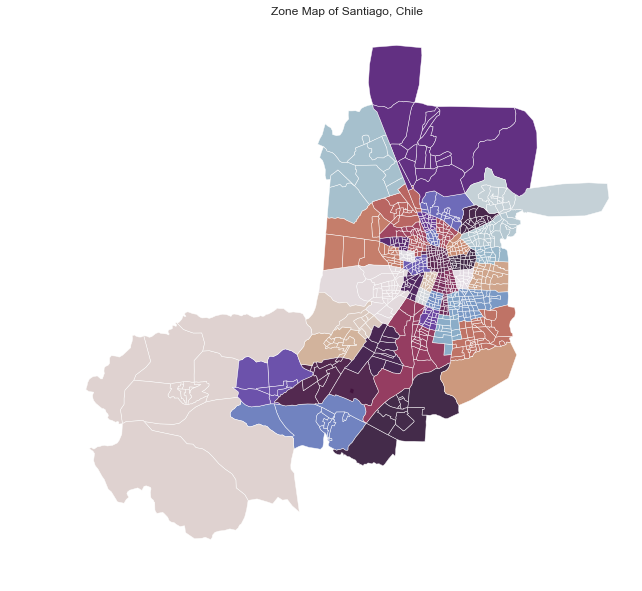

In [166]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = shp.plot(column="Comuna", edgecolor='white', 
              cmap = "twilight_shifted", linewidth = 0.5, alpha = 0.9, ax=ax)
ax.set_title("Zone Map of Santiago, Chile")
ax.set_axis_off()

# 2. Exploratary Data Analysis (EDA)

## 2.1 Summary Statistics

In [167]:
# print categorical columns
categorical

['cluster_7', 'type', 'cluster_2', 'exogenous_sector']

In [168]:
# set column type to be categorical
df_cleaned[categorical] = df[categorical].astype('category')

In [169]:
# obtain a list of continuous variables
continuous = list(set(df_cleaned.columns) - set(categorical))
continuous

['education_years',
 'avg_zone_income',
 'time_CBD',
 'Primary_School',
 'build_density',
 'industry_transit',
 'service_car',
 'service_transit',
 'subway_dis',
 'eduction_transit',
 'commerce_transit',
 'longitude',
 'survey_factor',
 'construction_quality',
 'industry_car',
 'latitude',
 'built_surface',
 'education_car',
 'monthly_rent',
 'highway_dis',
 'commerce_car',
 'household_income',
 'excluded_from_estimation',
 'habitational_transit',
 'Distance_CityCenter',
 'habitational_car']

obtain summary statistics of categorical features:

In [170]:
df_cleaned[categorical].describe()

,cluster_7,type,cluster_2,exogenous_sector
count,17841,17841,17841,17841
unique,7,3,2,7
top,5,2,1,2
freq,7863,7777,15283,3716


obtain summary statistics of continuous features:

In [171]:
continuous

['education_years',
 'avg_zone_income',
 'time_CBD',
 'Primary_School',
 'build_density',
 'industry_transit',
 'service_car',
 'service_transit',
 'subway_dis',
 'eduction_transit',
 'commerce_transit',
 'longitude',
 'survey_factor',
 'construction_quality',
 'industry_car',
 'latitude',
 'built_surface',
 'education_car',
 'monthly_rent',
 'highway_dis',
 'commerce_car',
 'household_income',
 'excluded_from_estimation',
 'habitational_transit',
 'Distance_CityCenter',
 'habitational_car']

In [172]:
df_cleaned[continuous].describe()

,education_years,avg_zone_income,time_CBD,Primary_School,build_density,industry_transit,service_car,service_transit,subway_dis,eduction_transit,...,built_surface,education_car,monthly_rent,highway_dis,commerce_car,household_income,excluded_from_estimation,habitational_transit,Distance_CityCenter,habitational_car
count,17841.000000,1.784100e+04,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,...,17841.000000,17841.000000,1.784100e+04,17841.000000,17841.000000,1.784100e+04,17841.000000,17841.000000,17841.000000,17841.000000
mean,12.140127,6.789951e+05,59.274256,4.125834,0.375778,1809.174210,6289.291057,2542.475915,4.601468,1331.338951,...,49.592579,3388.664656,1.861157e+05,1.998786,5876.956065,6.821480e+05,0.100555,21436.587305,18127.688807,58119.291331
std,3.524066,3.748078e+05,21.867401,3.089804,0.455876,1030.153261,1912.388030,1772.182180,7.585655,729.652034,...,22.232430,849.676400,1.580994e+05,1.687898,1577.105110,7.093147e+05,0.300747,10472.572084,12034.181462,13920.658856
min,0.000000,1.475140e+05,2.000000,0.000000,0.000000,33.553590,1061.180000,56.474950,0.014242,23.403120,...,0.000000,613.410000,1.000000e+04,0.012117,1048.440000,0.000000e+00,0.000000,374.878560,200.000000,10856.450000
25%,10.000000,4.754700e+05,45.000000,2.000000,0.177000,1038.710230,5083.130000,1105.525140,0.859505,811.921770,...,39.000000,3058.720000,1.102510e+05,0.887283,5081.660000,2.993170e+05,0.000000,14151.468420,9543.000000,53012.510000
50%,12.000000,5.786360e+05,59.000000,4.000000,0.253000,1656.292430,6432.510000,2048.700030,1.960832,1246.854420,...,45.400000,3522.550000,1.500000e+05,1.541765,6085.000000,5.040160e+05,0.000000,21118.602510,16189.000000,61213.100000
75%,14.000000,7.227974e+05,71.000000,6.000000,0.353000,2553.385640,7683.200000,3552.448550,4.287254,1832.195310,...,56.400000,3991.320000,2.000000e+05,2.594346,6961.840000,8.366210e+05,0.000000,29553.563730,23734.000000,68349.480000
max,24.000000,4.957229e+06,202.000000,15.000000,4.599000,4536.557030,10000.680000,7713.396150,49.844325,3151.932340,...,207.300000,4681.260000,5.000000e+06,13.618582,8583.060000,1.480000e+07,1.000000,44854.376160,91687.000000,75774.780000


## 2.2 Explore spatial distributions
In this section, we would like to first explore spatial patterns of some selected continuous features.

### 2.2.1 Type of house bought
<font color="navy">We would like to visualize and investigate how type of houses bought (variable `CLASE`) is distributed across space.</font>

first, create a geopandas dataframe from `df_cleaned`

In [173]:
gdf = gpd.GeoDataFrame(
    df_cleaned, geometry = gpd.points_from_xy(df_cleaned.longitude, df_cleaned.latitude))

In [174]:
gdf[['latitude','longitude','geometry']].head()

,latitude,longitude,geometry
0,-33.729444,-70.779035,POINT (-70.77903 -33.72944)
1,-33.737278,-70.744340,POINT (-70.74434 -33.73728)
2,-33.805994,-70.859656,POINT (-70.85966 -33.80599)
3,-33.805995,-70.859654,POINT (-70.85965 -33.80599)
4,-33.722055,-70.743270,POINT (-70.74327 -33.72205)


We would like to visualize how the type of house bought, `type` (former variable name: `CLASE`), is distributed across the city.

In [175]:
import warnings
warnings.filterwarnings("ignore")

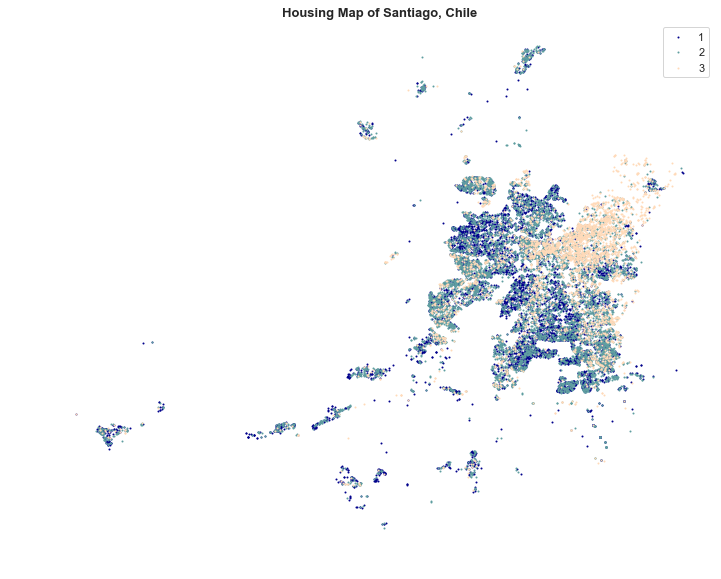

In [176]:
colors = ["darkblue","cadetblue","peachpuff"]
fig, ax = plt.subplots(figsize=(12,12))
for index, house_type in enumerate(df_cleaned.type.unique()):
    gdf[df_cleaned.type==house_type].plot(markersize=1,column='type', 
                                          label=str(house_type), ax=ax, color=colors[index])
ax.set_title("Housing Map of Santiago, Chile", fontweight="bold", fontsize=13)
ax.set_axis_off()
ax.legend()
plt.show()

<font color="brown">It can be seen that the type of house bought does display some spatial patterns and it is especially so for house type 3. Type 3 houses are cluttered at the North-East side of Santiago, whereas houses of the other two types are scattered throughout the city.</font>

### 2.2.2 Household quality & zone quality
Three features are selected:
    
* monthly_rent
* household_income
* education_years

These features indicate the quality of a household (quality here measures that of both the house and the owner).
<br>
<br>
<font color="navy">We would like to investigate how household quality is distributed across space, and whether this distribution agrees with the way zone quality is distributed.</font>

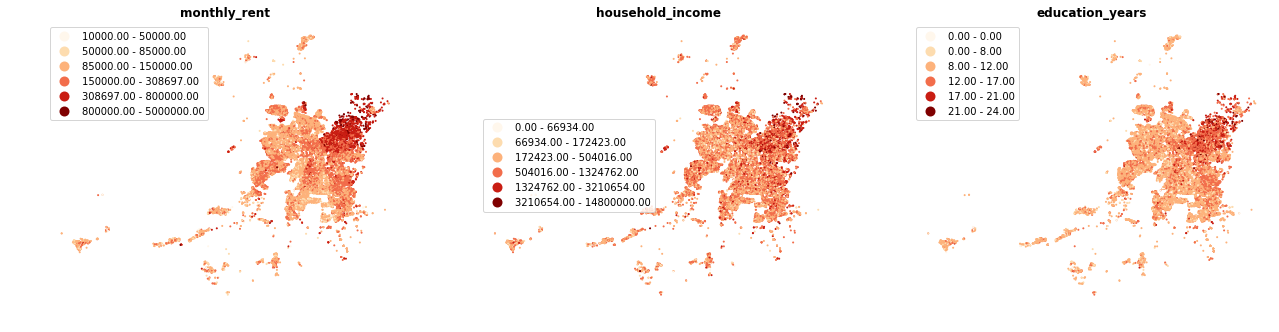

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,22))

ax1.set_title('monthly_rent',fontweight="bold")
ax1.set_axis_off()
gdf.plot(markersize=1,ax=ax1,column='monthly_rent',legend=True,cmap = "OrRd",scheme="percentiles")
ax2.set_title('household_income',fontweight="bold")
ax2.set_axis_off()
gdf.plot(markersize=1,ax=ax2,column='household_income',legend=True,cmap = "OrRd",scheme="percentiles")
ax3.set_title('education_years',fontweight="bold")
ax3.set_axis_off()
gdf.plot(markersize=1,ax=ax3,column='education_years',legend=True,cmap = "OrRd",scheme="percentiles")

plt.show()

As can be seen from the plots, higher quality households are likely to clutter at the North-East part of the city. We would like to compare our observation with the zone quality data, i.e.
* built_surface
* construction_quality
* build_density
* avg_zone_income

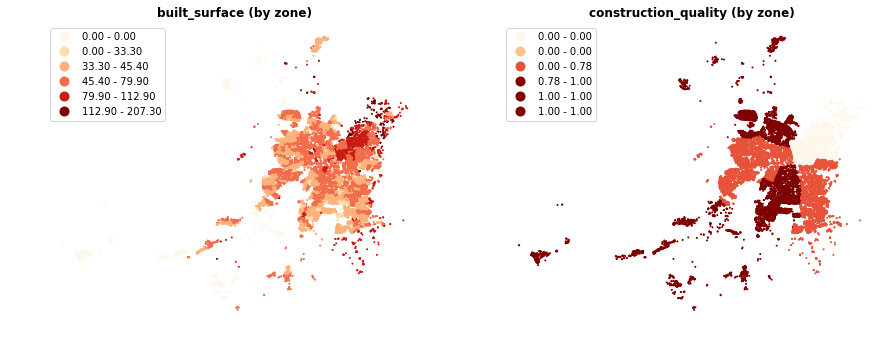

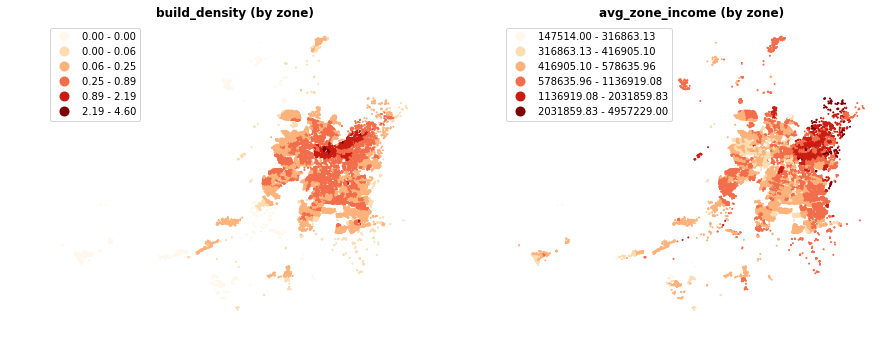

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.set_title('built_surface (by zone)',fontweight="bold")
ax1.set_axis_off()
gdf.plot(markersize=1,ax=ax1,column='built_surface',legend=True,cmap = "OrRd",scheme="percentiles")
ax2.set_title('construction_quality (by zone)',fontweight="bold")
ax2.set_axis_off()
gdf.plot(markersize=1,ax=ax2,column='construction_quality',legend=True,cmap = "OrRd",scheme="percentiles")

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,15))
ax3.set_title('build_density (by zone)',fontweight="bold")
ax3.set_axis_off()
gdf.plot(markersize=1,ax=ax3,column='build_density',legend=True,cmap = "OrRd",scheme="percentiles")
ax4.set_title('avg_zone_income (by zone)',fontweight="bold")
ax4.set_axis_off()
gdf.plot(markersize=1,ax=ax4,column='avg_zone_income',legend=True,cmap = "OrRd",scheme="percentiles")

plt.show()

<font color="brown">It is not to our surprise that better quality households tend to locate in the zones in which built surface and average zone income are the highest. Households with the highest average zone build density seem to be concentrated around the city center. The assumption that the better the household, the better the construction quality, however, does not hold. This can be seen from the plot at the top right corner, which clearly shows that construction quality are the best in zones south of the city and north of the city. Zones in the east that contain many of the best households (as seen from the previous viz), unfortunately, have the worst average construction quality scores.</font>

### 2.2.3 Accessibility
5 transit features:
* commerce_transit
* eduction_transit
* habitational_transit
* industry_transit
* service_transit

and 5 car features:
* commerce_car
* education_car
* habitational_car
* industry_car
* service_car

are selected.

These features indicate the accessibility of a household to key amentinies, by car and by transit.
<br>
<br>
<font color="navy">We would like to investigate how accessibility is distributed across space.</font>

In [61]:
# make a list of the features to be plotted
accessibility_features = ["commerce_transit","eduction_transit","habitational_transit","industry_transit","service_transit",
                          "commerce_car","education_car","habitational_car","industry_car","service_car"]

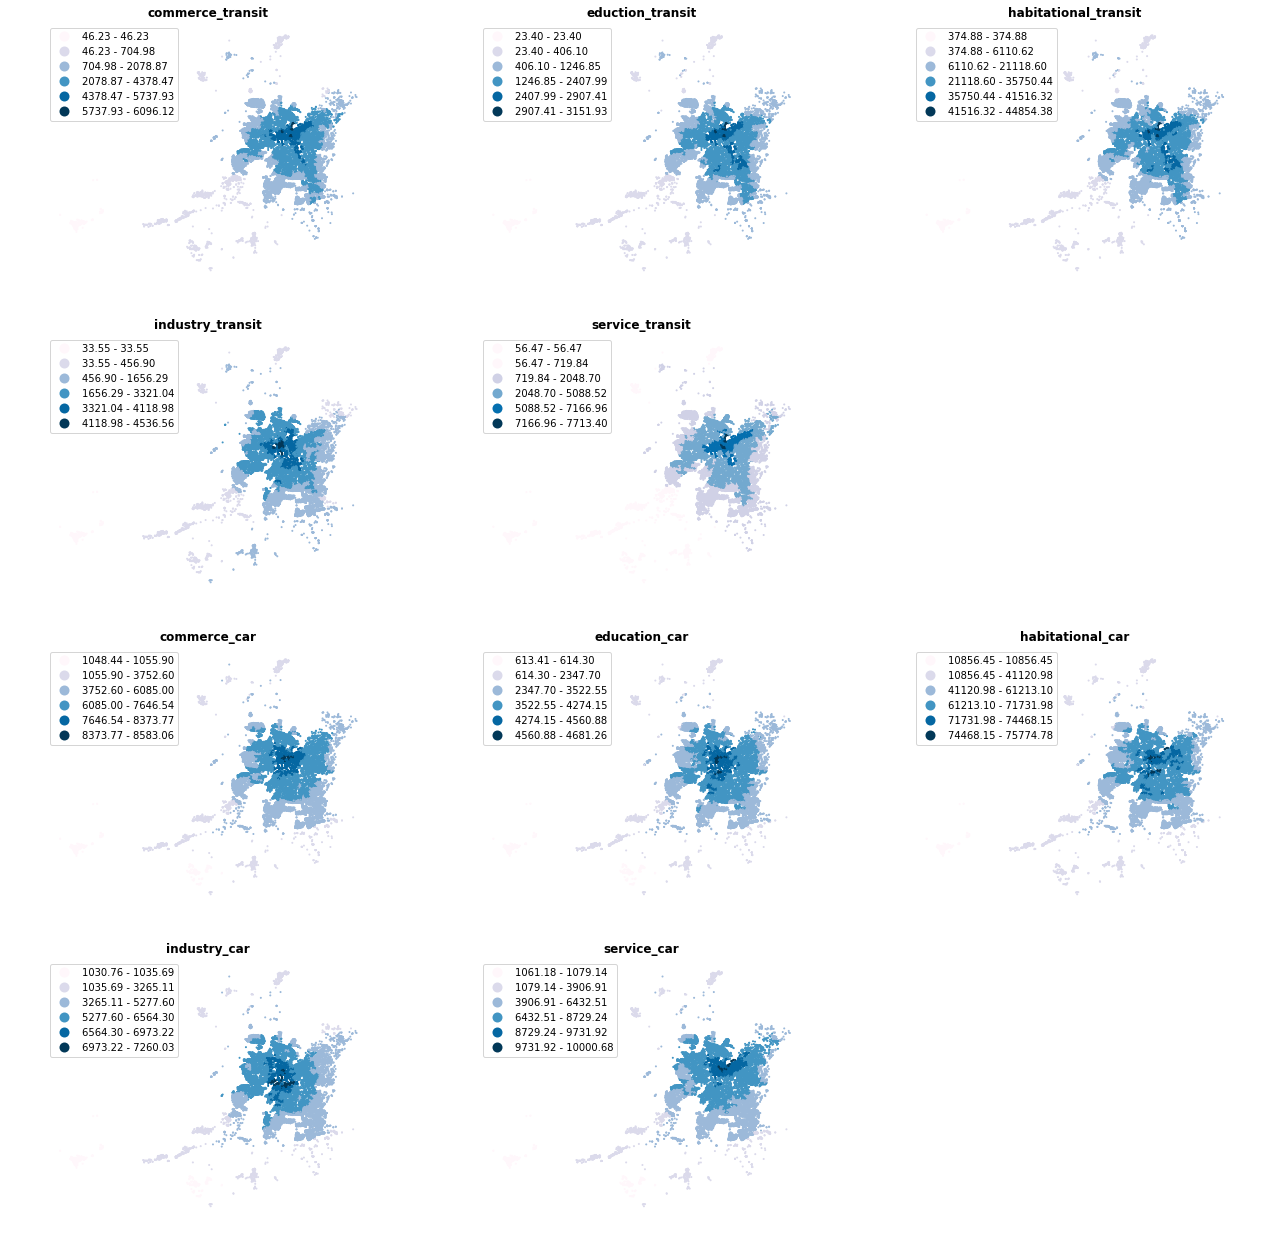

In [62]:
fig, ax = plt.subplots(4,3, figsize=(22,22))
ax = ax.flatten()
for i in range(12):
    ax[i].set_axis_off()
    if i < 5:
        ax[i].set_title(accessibility_features[i],fontweight="bold")
        gdf.plot(markersize=1,column=accessibility_features[i],legend=True,cmap = "PuBu",scheme="percentiles",ax=ax[i])
    if i > 5 and i < 11:
        ax[i].set_title(accessibility_features[i-1],fontweight="bold")
        gdf.plot(markersize=1,column=accessibility_features[i-1],legend=True,cmap = "PuBu",scheme="percentiles",ax=ax[i])

<font color="brown">**Within transit plots (first five), accessibilities do exhibit similar patterns:**
* accessibility decreases with distance from the city center
* higher accessibility households form a T-shaped region in central santiago (though less pronounced in industry_transit)
* the T shape may be the area covered most extensively by public transport

**Within car plots (first five), accessibilities do exhibit similar patterns:**
* accessibility decreases with distance from the city center

**Comparing all plots at once:**
* in general, accessibility decreases with distance from the city center. This could be due to the fact that most amenities are located near the center, and thus this pattern.
* unlike the T-shape in transit plots, no specific pattern is observed in car plots. This may be because the road network has a less defined shape than the public transport network. Accessibility to amenities by car depends on distance only. Thus, accessibility decreases gradually in a radial manner from the city center. This is in contrast with the transit plots, where accessibility near the public transport nodes will be significantly higher. This can be clearly seen in the plots where households along public transport lines (the T-shaped region) have the highest accessibility scores.</font>

## 2.3 Explore relationships between features
In this section, we would like to further investigate if there exists strong association between features

### 2.3.1 Correlation matrix for all continuous features
First, our group would like to plot a correlation matrix for the continuous variables. From the plot, we would like to gain insight into what the highly correlated pairs are. We will then take a closer look at these pairs in the following sections.

In [63]:
import seaborn as sns
sns.set(style="white")

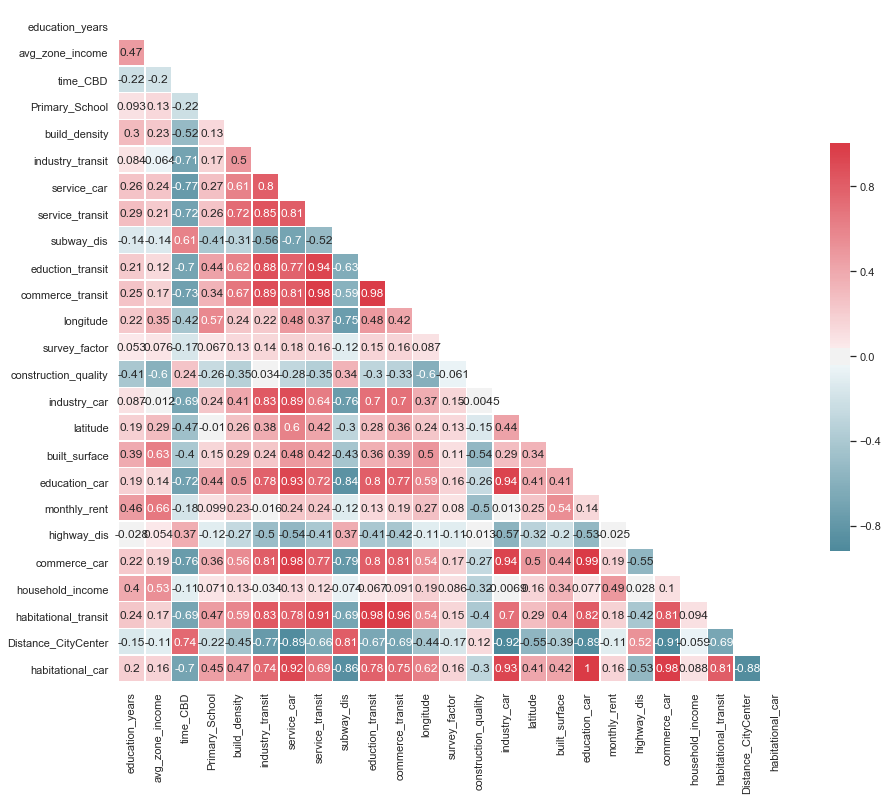

In [64]:
# Compute the correlation matrix
corr = df_cleaned[continuous].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<font color="brown">From the correlation plot, it can be seen that there are indeed many highly correlated pairs (dark red and dark blue):
* **Positive correlations:**
    * accessibility to industry, habitational, commerce, education, service in car and in transit are highly correlated with each other
    * distance to city center is positively correlated with distance to subway and travel time to CBD
<br>
<br>
* **Negative correaltions:**
    * accessibility to industry, habitational, commerce, education, service in car and in transit are negatively correlated with travel time to CBD, distance to city center, distance to subway and distance to highway
<br>
<br>    
* **Observations on household income:**
    * before plotting correlation, we would expect household income to be positively correlated with accessibility. However from the plot, we notice that our assumption does not hold. Household income has negligible association with all sorts of accessibility.
    * we do observe a moderately positive correlation between household income and built surface, monthly rent & average zone income. This is expected as wealthy familities can afford bigger houses, higher rentals and they tend to reside in rich neighbourhoods.</font>

### 2.3.2 Pairwise plots for selected features
In this section, our group decides to take a deeper look at the relationships between some variables and how they interact with each other. 
<br>
<br>
With the help of pairplot, we can visualize the relationship for each pair of the selected variables. The plot also draws the univariate distribution of each variable on the diagonal axes.

#### 2.3.2.1 Household quality vs type of houses bought
We go back to the household quality indicators identified earlier on:

3 household quality variables:
* monthly_rent
* household_income
* education_years

and an additional variable:
* type

<font color="navy">We would like to investigate how household quality variables are related to each other, and how they are related to the type of house finally bought.</font>

In [65]:
house_quality_features = ['monthly_rent','household_income','education_years']

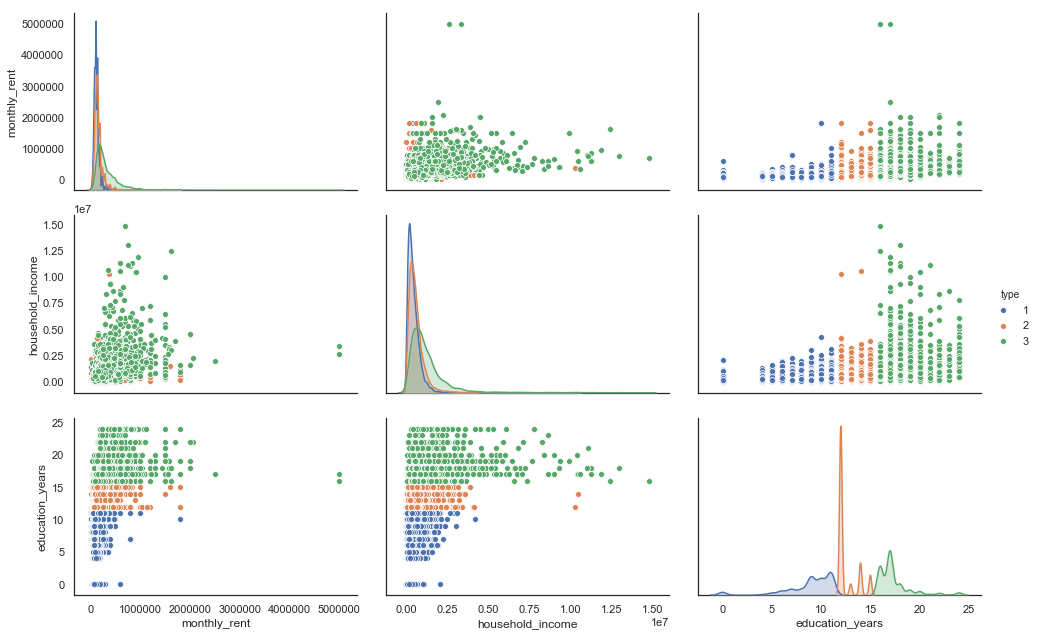

In [66]:
temp_df = df_cleaned[['monthly_rent','household_income','education_years', 'type']]
sns.pairplot(temp_df, vars=house_quality_features, hue='type', height=3, aspect=1.5)
plt.show()

<font color="brown">From the plot we can see that there is a clear relationship between the type of houses bought and household quality. Type 3 houses are favoured by well-educated, high-income, high-rental groups, whereas type 2 and type 1 houses are favoured by groups that are less and least educated and wealthy respecitively. This is a strong hint that household quality are powerful features in determining the type of houses to buy, and we should give more attention to these features more carefully when we perform predictions.

Besides that, there exist (weak) linear relationships between each pair of the three household quality features, as seen from the plot.</font>

#### 2.3.2.2 Zone quality vs type of houses bought
We go back to the zone quality indicators identified earlier on:

4 zone quality variables:
* built_surface
* construction_quality
* build_density
* avg_zone_income

and an additional variable:
* type

<font color="navy">We would like to investigate how zone quality variables are related to each other, and how they are related to the type of house finally bought.</font>

In [67]:
zone_quality_features = ['built_surface','construction_quality','build_density','avg_zone_income']

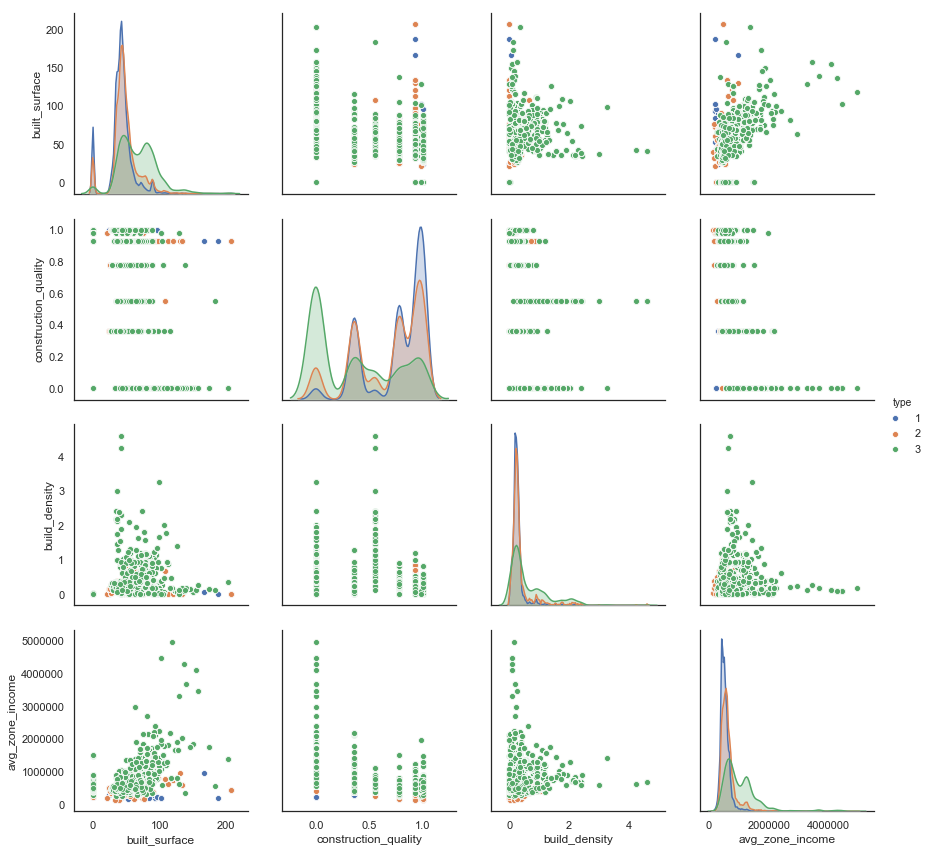

In [68]:
temp_df2 = df_cleaned[['built_surface','construction_quality','build_density','avg_zone_income','type']]
sns.pairplot(temp_df2, vars=zone_quality_features, hue='type', height=3, aspect=1)
plt.show()

<font color="brown">There exists a storng linear relationship between built surface and average zone income, indicating that larger houses are more likely to be in affluent zones. Weak linear relationships are observed between built density and average zone income, and between built density and built surface. From type 1 to type 3, the chance of a house being located in an affluent zone increases (bottom right plot). In general, zone quality features are not as significant as household quality features in determining the type of houses bought.</font>

# 3. Feature Engineering

## 3.1 Remove irrelevant features
In this section, we remove feature(s) that is/are not useful for model fitting

### 3.1.1 Remove `excluded_from_estimation` (`EXCLUIR`)
`excluded_from_estimation`, or `EXCLUIR`, is to mark whether the respondents answered the questions. We should drop rows where `excluded_from_estimation` is 1 (no response). After dropping these rows, there is only 0 in the `excluded_from_estimation` column. Thus we drop this column too as this feature only has one level, and will not help in predicting type of houses.

In [177]:
# check number of unique levels in excluded_from_estimation
df_cleaned.excluded_from_estimation.unique()

array([0, 1], dtype=int64)

In [178]:
# check number of rows with excluded_from_estimation == 1
excluir_1 = df_cleaned[df_cleaned.excluded_from_estimation == 1]
len(excluir_1)

1794

In [179]:
# drop these rows
df_cleaned = df_cleaned.drop(excluir_1.index, axis=0)

In [180]:
# verify if all relevant rows have been dropped
df_cleaned.excluded_from_estimation.unique()

array([0], dtype=int64)

Now that `excluded_from_estimation` only contains one level, 0, and thus is not useful for prediction. We thus remove this feature from the dataset.

In [181]:
df_cleaned = df_cleaned.drop(['excluded_from_estimation'], axis=1)

Since the column is dropped, we need to update our list of categorical variables too:

In [146]:
categorical.remove("excluded_from_estimation")

In [147]:
categorical

['cluster_7', 'type', 'cluster_2', 'exogenous_sector']

### 3.1.2 Remove `geometry`
`geometry` was created and used earlier on in EDA to visualize how different attributes are distributed across space. However it itself is not useful in predictions. We therefore remove this column from the dataset.

In [182]:
df_cleaned = df_cleaned.drop(['geometry'], axis=1)

In [183]:
df_cleaned.columns

Index(['exogenous_sector', 'monthly_rent', 'household_income', 'survey_factor',
       'education_years', 'type', 'built_surface', 'construction_quality',
       'build_density', 'subway_dis', 'highway_dis', 'time_CBD',
       'avg_zone_income', 'commerce_transit', 'eduction_transit',
       'habitational_transit', 'industry_transit', 'service_transit',
       'commerce_car', 'education_car', 'habitational_car', 'industry_car',
       'service_car', 'cluster_7', 'cluster_2', 'latitude', 'longitude',
       'Distance_CityCenter', 'Primary_School'],
      dtype='object')

## 3.2 One-hot encoding
We would like to encode the categorical variables using dummy variables, a standard procedure before feeding the dataset to a machine learning model.

In [184]:
categorical

['cluster_7', 'type', 'cluster_2', 'exogenous_sector']

exclude `type` from the list of categorical variables to be encoded, as this is our output vector

In [185]:
one_hot_vars = ['cluster_7','cluster_2','exogenous_sector']

In [186]:
df_cleaned = pd.get_dummies(data = df_cleaned, columns = one_hot_vars, dtype=int)
df_cleaned.head()

,monthly_rent,household_income,survey_factor,education_years,type,built_surface,construction_quality,build_density,subway_dis,highway_dis,...,cluster_7_7,cluster_2_1,cluster_2_2,exogenous_sector_1,exogenous_sector_2,exogenous_sector_3,exogenous_sector_4,exogenous_sector_5,exogenous_sector_6,exogenous_sector_7
0,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,...,0,1,0,0,0,0,0,0,0,1
1,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,...,0,1,0,0,0,0,0,0,0,1
2,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,...,0,1,0,0,0,0,0,0,0,1
3,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,...,0,1,0,0,0,0,0,0,0,1
4,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,...,0,1,0,0,0,0,0,0,0,1


adjust the order of the columns so that the output vector, `type`, is the last column

In [188]:
col_type = df_cleaned.type

In [189]:
df_cleaned = df_cleaned.drop(["type"], axis=1)

In [190]:
df_cleaned['type'] = col_type

In [191]:
df_cleaned.head()

,monthly_rent,household_income,survey_factor,education_years,built_surface,construction_quality,build_density,subway_dis,highway_dis,time_CBD,...,cluster_2_1,cluster_2_2,exogenous_sector_1,exogenous_sector_2,exogenous_sector_3,exogenous_sector_4,exogenous_sector_5,exogenous_sector_6,exogenous_sector_7,type
0,100000,450845,136.393738,11,53.8,0.98,0.059,23.051711,4.345179,69,...,1,0,0,0,0,0,0,0,1,1
1,120000,1019369,73.843597,11,59.6,0.98,0.033,21.080177,1.381521,84,...,1,0,0,0,0,0,0,0,1,1
2,70000,80000,180.722809,10,59.5,0.98,0.004,34.147894,11.993389,83,...,1,0,0,0,0,0,0,0,1,1
3,80000,559259,150.379059,14,59.5,0.98,0.004,34.147817,11.993268,83,...,1,0,0,0,0,0,0,0,1,2
4,117771,710309,122.001518,12,43.6,0.98,0.086,19.908792,1.363177,94,...,1,0,0,0,0,0,0,0,1,2


## 3.3 Normalization
Normalization is important for distance-based algorithms such as kNN, and is crucial for neutral networks. In general, it is a good practice to normalize the dataset before fitting it to a model. Here, we will normalize the data using min-max scaler.

In [194]:
# find the columns that need to be standardized
# i.e. all columns excluding the type column
x_columns = df_cleaned.columns[:-1]
x_columns

Index(['monthly_rent', 'household_income', 'survey_factor', 'education_years',
       'built_surface', 'construction_quality', 'build_density', 'subway_dis',
       'highway_dis', 'time_CBD', 'avg_zone_income', 'commerce_transit',
       'eduction_transit', 'habitational_transit', 'industry_transit',
       'service_transit', 'commerce_car', 'education_car', 'habitational_car',
       'industry_car', 'service_car', 'latitude', 'longitude',
       'Distance_CityCenter', 'Primary_School', 'cluster_7_1', 'cluster_7_2',
       'cluster_7_3', 'cluster_7_4', 'cluster_7_5', 'cluster_7_6',
       'cluster_7_7', 'cluster_2_1', 'cluster_2_2', 'exogenous_sector_1',
       'exogenous_sector_2', 'exogenous_sector_3', 'exogenous_sector_4',
       'exogenous_sector_5', 'exogenous_sector_6', 'exogenous_sector_7'],
      dtype='object')

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
# scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cleaned[x_columns])

In [201]:
# convert the 2D array into pandas dataframe
df_scaled = pd.DataFrame(df_scaled, columns=x_columns)

In [202]:
# append the type column (not scaled) to the dataframe
df_scaled['type'] = df_cleaned['type']

In [203]:
df_scaled.head()

,monthly_rent,household_income,survey_factor,education_years,built_surface,construction_quality,build_density,subway_dis,highway_dis,time_CBD,...,cluster_2_1,cluster_2_2,exogenous_sector_1,exogenous_sector_2,exogenous_sector_3,exogenous_sector_4,exogenous_sector_5,exogenous_sector_6,exogenous_sector_7,type
0,0.018036,0.034680,0.142347,0.458333,0.259527,0.98,0.012829,0.462250,0.318456,0.335,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.022044,0.078413,0.074504,0.458333,0.287506,0.98,0.007175,0.422679,0.100644,0.410,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.012024,0.006154,0.190426,0.416667,0.287024,0.98,0.000870,0.684959,0.880557,0.405,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.014028,0.043020,0.157515,0.583333,0.287024,0.98,0.000870,0.684958,0.880548,0.405,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,0.021597,0.054639,0.126737,0.500000,0.210323,0.98,0.018700,0.399169,0.099295,0.460,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


## 3.4 Feature selection
In this section, we would like to run several algorithms to see which features contribute the most in explaining the type of houses bought. The methods that we will be using are:
* SelectKBest (base estimator: chi-squared)
* Recursive Feature Elimination (base estimtor: logistic regression)
* Tree-based estimator with built-in feature selection 

Feature selection is necessary as it reduces the chance of overfitting and keeps our model simple and explainable (Occam’s Razor).

In [226]:
# firstly, remove the output vector, type, from the dataframe
df_scaled_X = df_scaled.drop(['type'], axis=1)

In [231]:
# keep a copy of the output vector
df_scaled_y = df_cleaned['type']

In [229]:
# print the total number of features we have originally
len(df_scaled_X.columns)

41

### 3.4.1 SelectKBest (base estimator: chi-squared)
This is a filter based feature selection method, where we specify some metric and use that to filter features. Here, the metric chosen is chi-squared test. Note that chi-sqaured is only for non-negative features, which is suitable for our dataset. This is become after min-max scaling, all values in the dataset are bounded by 0 and 1.

In [228]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [264]:
# fit the chi-squared model
chi_selector = SelectKBest(chi2)
chi_selector.fit(df_scaled_X, df_scaled_y)

# store the result in dataframes
chi_scores = pd.DataFrame(chi_selector.scores_)
chi_columns = pd.DataFrame(df_scaled_X.columns)

# concat the two dataframes
chi_df = pd.concat([chi_columns, chi_scores], axis=1)
chi_df.columns = ['Feature','Score']  # name the dataframe columns

# rank and sort the features based on their scores
chi_df = chi_df.nlargest(41,'Score').reset_index().drop('index',axis=1)
chi_df

,Feature,Score
0,exogenous_sector_3,2912.403404
1,cluster_2_2,2755.904407
2,cluster_7_6,1761.244549
3,cluster_7_5,980.379276
4,cluster_7_7,802.396517
5,cluster_7_4,571.060080
6,construction_quality,519.200072
7,education_years,506.322633
8,cluster_2_1,458.983498
9,exogenous_sector_5,360.393824


plot a line chart for better visualization:

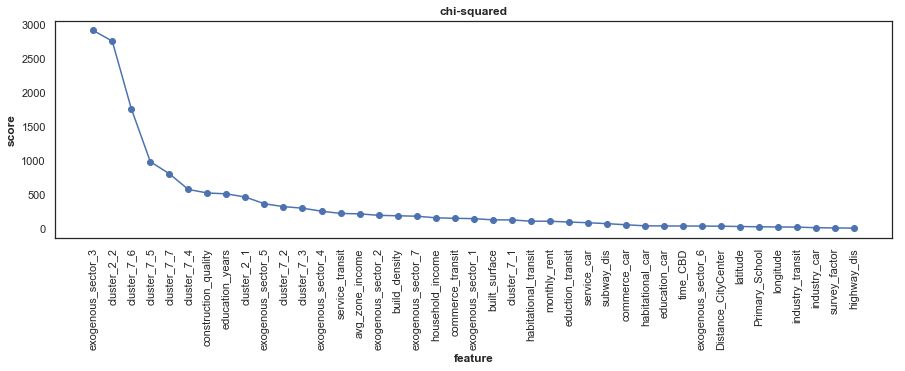

In [262]:
plt.figure(figsize=(15,4))
plt.plot(chi_df['Feature'], chi_df['Score'], marker='o')
plt.xticks(rotation='vertical')
plt.xlabel("feature", fontweight="bold")
plt.ylabel("score", fontweight="bold")
plt.title("chi-squared", fontweight="bold")
plt.show()

<font color="brown">As can be seen, the 'elbow' of the plot appears to be at the 4th-6th feature, and features after the 10th seem to plateau.</font>

We keep a list of the top 15 features from the chi-squared feature selection:

In [283]:
chi_squared_features = chi_df['Feature'].tolist()[:15]
chi_squared_features

['exogenous_sector_3',
 'cluster_2_2',
 'cluster_7_6',
 'cluster_7_5',
 'cluster_7_7',
 'cluster_7_4',
 'construction_quality',
 'education_years',
 'cluster_2_1',
 'exogenous_sector_5',
 'cluster_7_2',
 'cluster_7_3',
 'exogenous_sector_4',
 'service_transit',
 'avg_zone_income']

### 3.4.2 Recursive Feature Elimination (base estimtor: logistic regression)

This is a wrapper based feature selection method, where we consider the selection of a set of features as a search problem. The algorithm used is Recursive Feature Elimination (RFE), which selects features by recursively considering smaller and smaller sets of features. Since we could use any estimator with this method, our group decides to try out logistic regression first.

In [259]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [282]:
# fit the RFE model
# select 15 best features
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe_selector.fit(df_scaled_X, df_scaled_y)

# obtain a list of selected features
rfe_support = rfe_selector.get_support()
rfe_features = df_scaled_X.loc[:,rfe_support].columns.tolist()
rfe_features

['monthly_rent',
 'household_income',
 'education_years',
 'build_density',
 'subway_dis',
 'education_car',
 'industry_car',
 'longitude',
 'Distance_CityCenter',
 'cluster_7_3',
 'cluster_7_4',
 'cluster_7_6',
 'cluster_7_7',
 'cluster_2_1',
 'cluster_2_2']

### 3.4.3 Tree-based estimator with built-in feature selection 
We can also use any algorithm that has a built-in feature selection method. The algorithm that we choose to use in this case is random forest, a tree-based estimator.

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [276]:
# fit the random forest model
rf_selector = RandomForestClassifier(n_estimators=100)
rf_selector.fit(df_scaled_X, df_scaled_y)

# store the result in dataframes
rf_scores = pd.DataFrame(rf_selector.feature_importances_)
rf_columns = pd.DataFrame(df_scaled_X.columns)

# concat the two dataframes
rf_df = pd.concat([rf_columns, rf_scores], axis=1)
rf_df.columns = ['Feature','Score']  # name the dataframe columns

# rank and sort the features based on their scores
rf_df = rf_df.nlargest(41,'Score').reset_index().drop('index',axis=1)
rf_df

,Feature,Score
0,education_years,0.721262
1,monthly_rent,0.039482
2,household_income,0.029008
3,avg_zone_income,0.027218
4,construction_quality,0.019622
5,longitude,0.012511
6,latitude,0.012433
7,subway_dis,0.011721
8,highway_dis,0.011073
9,survey_factor,0.010955


plot a line chart for better visualization:

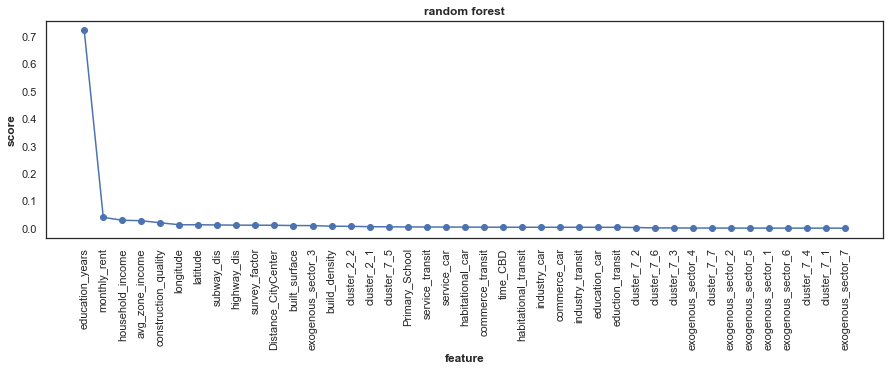

In [277]:
plt.figure(figsize=(15,4))
plt.plot(rf_df['Feature'], rf_df['Score'], marker='o')
plt.xticks(rotation='vertical')
plt.xlabel("feature", fontweight="bold")
plt.ylabel("score", fontweight="bold")
plt.title("random forest", fontweight="bold")
plt.show()

<font color="brown">education_year is so much more significant than the rest features that the difference in the scores of the rest become hard to visualize.</font>

Thus, we remove education_years and plot again the scores of the rest features:

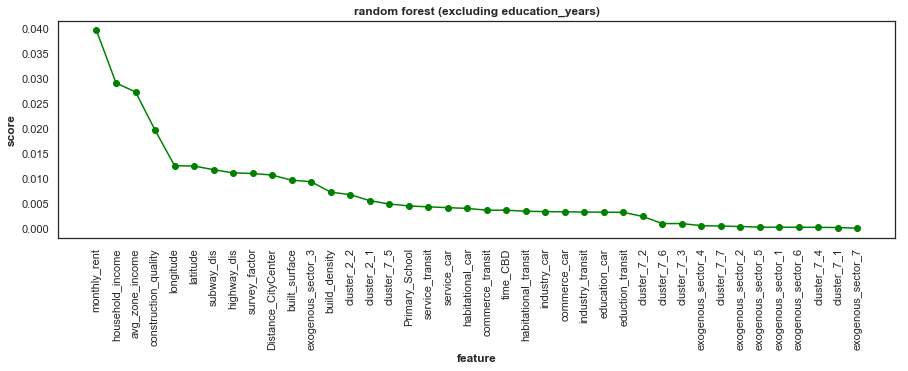

In [279]:
plt.figure(figsize=(15,4))
plt.plot(rf_df['Feature'][1:], rf_df['Score'][1:], marker='o', color="green")
plt.xticks(rotation='vertical')
plt.xlabel("feature", fontweight="bold")
plt.ylabel("score", fontweight="bold")
plt.title("random forest (excluding education_years)", fontweight="bold")
plt.show()

<font color="brown">This time round, it can be seen that the 'elbow' is likely to be the 6th most important feature, longitude.</font>

We keep a list of the top 15 features from the random forest feature selection:

In [281]:
rf_features = rf_df['Feature'].tolist()[:15]
rf_features

['education_years',
 'monthly_rent',
 'household_income',
 'avg_zone_income',
 'construction_quality',
 'longitude',
 'latitude',
 'subway_dis',
 'highway_dis',
 'survey_factor',
 'Distance_CityCenter',
 'built_surface',
 'exogenous_sector_3',
 'build_density',
 'cluster_2_2']

### 3.4.4 Combine all feature selections
As can be seen above, different feature selection methods yield different, yet sometimes similar results. In fact, we can combine the various feature selection tools and use majority voting to decide which features to keep.

In [284]:
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier

15 top features are extracted from each feature selection method. Other than the three methods discussed above, we introduce more base estimators so as to improve the robustness of our feature selection.

In [286]:
# chi-squared
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(df_scaled_X, df_scaled_y)
chi_support = chi_selector.get_support()

# RFE: logistic regression
lr_rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15)
lr_rfe_selector.fit(df_scaled_X, df_scaled_y)
lr_rfe_support = lr_rfe_selector.get_support()

# RFE: SVM
svm_rfe_selector = RFE(estimator=LinearSVC(), n_features_to_select=15)
svm_rfe_selector.fit(df_scaled_X, df_scaled_y)
svm_rfe_support = svm_rfe_selector.get_support()

# built-in feature selection: random forest
rf_embedded_selector = SelectFromModel(RandomForestClassifier(), max_features=15)
rf_embedded_selector.fit(df_scaled_X, df_scaled_y)
rf_embedded_support = rf_embedded_selector.get_support()

# built-in feature selection: Lasso
lr_embedded_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=15)
lr_embedded_selector.fit(df_scaled_X, df_scaled_y)
lr_embedded_support = lr_embedded_selector.get_support()

# built-in feature selection: LightGBM
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgb_embedded_selector = SelectFromModel(lgbc, max_features=15)
lgb_embedded_selector.fit(df_scaled_X, df_scaled_y)
lgb_embedded_support = lgb_embedded_selector.get_support()

In [291]:
feature_selection_df = pd.DataFrame({'Feature':df_scaled_X.columns, 'Chi-2':chi_support, 
                                     'RFE: logistic regression':lr_rfe_support, 'RFE: SVM':svm_rfe_support,
                                     'embedded: random forest':rf_embedded_support, 'embedded: Lasso':lr_embedded_support,
                                     'embedded: LightGBM':lgb_embedded_support})

In [292]:
# count number of times each feature is selected
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# sort and display the feature selection dataframe
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Chi-2,RFE: logistic regression,RFE: SVM,embedded: random forest,embedded: Lasso,embedded: LightGBM,Total
1,monthly_rent,False,True,True,True,True,True,5
2,household_income,False,True,True,True,True,True,5
3,education_years,True,True,True,True,True,False,5
4,cluster_7_4,True,True,True,False,True,False,4
5,cluster_2_2,True,True,True,False,True,False,4
6,cluster_2_1,True,True,True,False,True,False,4
7,service_car,False,False,True,False,True,True,3
8,longitude,False,True,False,False,True,True,3
9,cluster_7_7,True,True,True,False,False,False,3
10,cluster_7_6,True,True,True,False,False,False,3


discard the features that are not selected by any method at all:

In [295]:
selected_features = feature_selection_df[feature_selection_df.Total != 0]['Feature'].tolist()

Since half of the exogenous sectors are not selected at all (Total == 1), and the rest exogenous sectors are selected at most once, we conclude that exogenous sector is not a significant feature, and thus we decide to remove the remaining exogenous features from our feature list:

In [300]:
selected_features = list(filter(lambda x: x not in ['exogenous_sector_5','exogenous_sector_4',
                                              'exogenous_sector_3','exogenous_sector_1'], selected_features))

Thus our final feature space is:

In [301]:
selected_features

['monthly_rent',
 'household_income',
 'education_years',
 'cluster_7_4',
 'cluster_2_2',
 'cluster_2_1',
 'service_car',
 'longitude',
 'cluster_7_7',
 'cluster_7_6',
 'cluster_7_3',
 'build_density',
 'survey_factor',
 'subway_dis',
 'industry_car',
 'eduction_transit',
 'commerce_transit',
 'cluster_7_5',
 'cluster_7_2',
 'avg_zone_income',
 'Distance_CityCenter',
 'time_CBD',
 'service_transit',
 'latitude',
 'industry_transit',
 'highway_dis',
 'habitational_transit',
 'education_car',
 'construction_quality',
 'commerce_car',
 'cluster_7_1',
 'built_surface']

## 3.5 Dimensionality reduction
The difference between dimensionality reduction and feature selection is that the former projects features into a lower dimension, whereas the latter simply selects and excludes given features without changing them.

We decide to use PCA to transform the original features into a lower dimensional space.

Later at the model fitting stage, we will fit both the original dataset (after feature selection), as well as the dimensionally reduced dataset to the models, one by one. We will decide which dataset to use based on each one's model performance then.

### 3.5.1 Principal Component Analysis (PCA)

In [206]:
from sklearn import decomposition

The `n_components` parameter is set to be equal to the number of features first, to give a rough gauge of the number of PCs needed to cover a decent level of varaince.

In [207]:
pca = decomposition.PCA() # if n_components is not set all components are kept
pca.fit(df_scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Create a cumulative graph to visualize the number of vectors needed to cover X% of the variance:

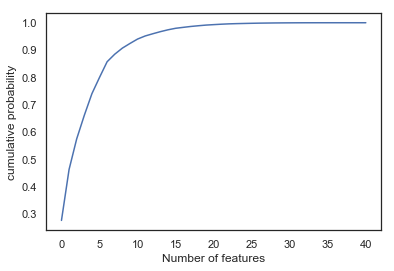

In [208]:
expl = pca.explained_variance_ratio_
cdf = [sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf)
plt.xlabel("Number of features")
plt.ylabel("cumulative probability")
plt.show()

In [213]:
cdf[:20]

[0.27677670218002765,
 0.4632337956521889,
 0.5750054989937445,
 0.6611427035238782,
 0.7403768040344378,
 0.799927661772526,
 0.8573255954955614,
 0.884866042793125,
 0.9071087943804377,
 0.9241448043294576,
 0.940297333225418,
 0.9515837296136646,
 0.9596959691819736,
 0.9673760296367167,
 0.974189355044446,
 0.9797127146308353,
 0.9831267885294562,
 0.9863956023936185,
 0.9890357469954726,
 0.9914264092519134]

<font color="brown">It can be seen that with 10 features, we can explain over 90% of the variance; with 20 features, we can explain more than 99% of the variance.</font>

We decide to set `n_components` to `10`.

In [217]:
pca2 = decomposition.PCA(n_components=10)
pca2.fit(df_scaled_X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Plot the eigenvectors

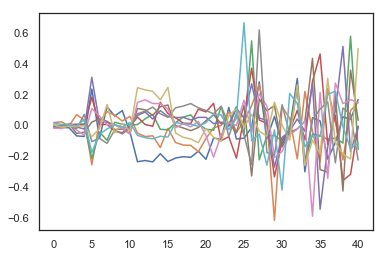

In [218]:
for eigenvector in pca2.components_:
    plt.plot(range(len(eigenvector)), eigenvector)

obtain the dimensionally reduced dataframe (10 principal components)

In [224]:
principal_components = pca2.fit_transform(df_scaled_X)
df_pca = pd.DataFrame(data = principal_components, 
                            columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [225]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.418312,0.909678,-0.598049,0.023045,0.024004,0.089897,0.357389,-0.065135,0.403922,-0.081854
1,1.398245,0.895292,-0.591571,0.023339,0.020546,0.087549,0.348860,-0.049011,0.403241,-0.077448
2,1.525239,0.979128,-0.616039,-0.019977,0.024353,0.073572,0.394151,-0.142175,0.438444,-0.105423
3,1.513502,0.991540,-0.615255,-0.019390,0.022074,0.063555,0.388014,-0.146077,0.436814,-0.106215
4,1.401895,0.892552,-0.590699,0.024300,0.021555,0.092203,0.350023,-0.054561,0.400337,-0.080086


In [72]:
def Train_Test_Split(dataframe):
    test=dataframe[(dataframe.latitude < -33.4) & (dataframe.latitude > -33.5) &
                   (dataframe.longitude > -70.7) & (dataframe.longitude < -70.6)]
    train=dataframe[(dataframe.latitude > -33.4) | (dataframe.latitude < -33.5) |
                    (dataframe.longitude < -70.7) | (dataframe.longitude > -70.6)]
    return train, test

In [73]:
train, test = Train_Test_Split(df)

In [84]:
def Features_Label_Split(dataframe):
    label = dataframe[['type']]
    features = dataframe.drop(['type'], axis=1)
    return features, label

In [85]:
feature, label = Features_Label_Split(train)

# 3. Define functions for fitted model
(Logistic Regression/KNN/Linear Regression/SVC/Random forest/NN)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def logistic_reg_model(X_train, X_test, y_train):
    
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred1 = classifier.predict(X_test)
    
    return y_pred1

In [ ]:
def linear_regression(X_train, X_test, y_train):
    
    classifier = LinearRegression()
    classifier.fit(X_train,y_train)
    y_pred2 = classifier.predict(X_test)
    
    return y_pred2

In [ ]:
def knn_model(X_train, X_test, y_train, n):
    
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(X_train,y_train)
    y_pred3 = classifier.predict(X_test)
    
    return y_pred3

In [ ]:
def svm_model(X_train, X_test, y_train):
    
    classifier = SVC 
    classifier.fit(X_train, y_train)
    y_pred4 = classifier.predict(X_test)
    
    return y_pred4

In [ ]:
def random_forest(X_train, X_test, y_train)

    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    y_pred5 = classifier.predict(X_test)
    
    return y_pred5

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

def nn_model(X_train, y_train, num_epochs=15, batch_size=2048):

    classifier = Sequential()
    classifier.add(Dense(150, input_dim=30, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(100, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(30, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    classifier.fit(X_train,y_train,epochs=num_epochs, batch_size=batch_size, verbose=2)
    
    # predict the result 
    y_pred6 = predict(X_test)
    
    return y_pred6